# Case 1: Chatbot Integration

In this case we are a company that would like to integrate a new chatbot to their webasite in order to reduce the customer service workload. We have a developers team and we need to choose to most appropiate LLM to integrate with out web application.

In [154]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

scales = {
    "Reasoning": QuantitativeScale(0, 100, PreferenceDirection.MAX),                # GPQA score (1 - 100)
    "Cost": QuantitativeScale(0, 50, PreferenceDirection.MIN),                      # Cost $ per 1M tokens
    "Context Window": QuantitativeScale(8000, 2000000, PreferenceDirection.MAX),    # Context Window in tokens
    "Multilingual": QuantitativeScale(0, 100, PreferenceDirection.MAX),             # Multilingual accuracy (1 - 100)
    "Speed": QuantitativeScale(1000, 4000000, PreferenceDirection.MAX)              # Speed in TPM
}

alternatives = [
    "GPT-4.1",               
    "GPT o4-mini",             
    "GPT o3",              
    "Claude 3.5 Sonnet",        
    "Claude 3 Opus",      
    "Llama 3.1 405b",       
    "Llama 3.1 70b",       
    "Llama 3.1 8b",              
    "Grok 2",           
    "Grok 3",            
    "Gemini 2.5 Pro",              
    "Gemini 1.5 Pro",               
    "Gemini 1.5 Flash"        
]


performance_data = [  
    # Reasoning, Cost, Context Window, Multilingual, Speed
    [66.3, 10, 1047576, 89.6, 30000],
    [77.6, 5.5, 200000, 80, 100000],
    [82.8, 50, 200000, 91.7, 30000],
    [59.4, 18, 200000, 92, 3052],
    [50.4, 90, 200000, 84.9, 1680],
    [50.7, 3.25, 128000, 91.6, 2215],
    [41.7, 0.84, 128000, 86.9, 2754],
    [30.4, 0.1, 128000, 68.9, 12546],
    [56, 12, 8192, 86.2, 1200],
    [75.4, 18, 131072, 91.2, 4320],
    [84, 17.5, 2000000, 74.4, 1000000],
    [46.2, 12.5, 2000000, 75.3, 4000000],
    [39.5, 0.75, 1000000, 74.1, 4000000]
]


criteria = {
    "Reasoning": 0.05,
    "Cost": 0.25,
    "Context Window": 0.05,
    "Multilingual": 0.3,
    "Speed": 0.35
}

**Criteria Justification:**
- **Reasoning**: Needed but it is not the most important feature. The LLM is informed of the infermation it has to answer.
- **Cost**: This is an important criteria because we are receiveing many requests from the customers, and a high volume of chats may affect the scalability of the project.
- **Context Window**: We don't need a very large window since customer just want to solve some questions.
- **Multilingual**: Important criteria given that we are an international company and we deal with customers all over the world.
- **Speed**: Also an important criteria because of the user experience (UX) of our web application.

In [155]:
# Indifference thresholds (q)
q = {
    "Reasoning": 5,  
    "Cost": 2,       
    "Context Window": 200000,          
    "Multilingual": 3,             
    "Speed": 1500                  
}

# Preference thresholds (p)
p = {
    "Reasoning": 10,    
    "Cost": 5,       
    "Context Window": 500000,    
    "Multilingual": 6,              
    "Speed": 10000           
}

# Veto thresholds (v)
v = {
    "Reasoning": None,
    "Cost": 7,
    "Context Window": None,
    "Multilingual": 10,
    "Speed": None
}

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.000000,0.391667,0.950,1.000000,1.000,0.750000,0.750000,0.750000,1.000,0.959000,0.550,0.600,0.400000
GPT o4-mini,0.650000,1.000000,0.698,0.700000,0.810,0.679167,0.478333,0.750000,0.700,0.700000,0.586,0.600,0.370833
GPT o3,0.700000,0.400000,1.000,0.750000,1.000,0.750000,0.750000,0.750000,0.750,0.750000,0.350,0.350,0.350000
Claude 3.5 Sonnet,0.331000,0.350000,0.600,1.000000,1.000,0.750000,0.750000,0.420835,0.750,0.950000,0.550,0.350,0.350000
Claude 3 Opus,0.130000,0.350000,0.050,0.410000,1.000,0.450000,0.750000,0.400000,0.744,0.353059,0.300,0.350,0.350000
Llama 3.1 405b,0.550000,0.600000,0.600,0.963000,1.000,1.000000,0.965833,0.554167,0.997,0.925088,0.550,0.600,0.558333
Llama 3.1 70b,0.550000,0.600000,0.420,0.740000,0.963,0.790000,1.000000,0.658565,0.950,0.817282,0.550,0.600,0.600000
Llama 3.1 8b,0.250000,0.300000,0.300,0.650000,0.650,0.650000,0.650000,1.000000,0.650,0.650000,0.300,0.250,0.339000
Grok 2,0.510000,0.350000,0.350,0.705506,1.000,0.510000,0.747776,0.400000,1.000,0.683294,0.550,0.600,0.350000
Grok 3,0.350000,0.400000,0.626,1.000000,1.000,0.750000,0.750000,0.473047,0.750,1.000000,0.564,0.350,0.350000


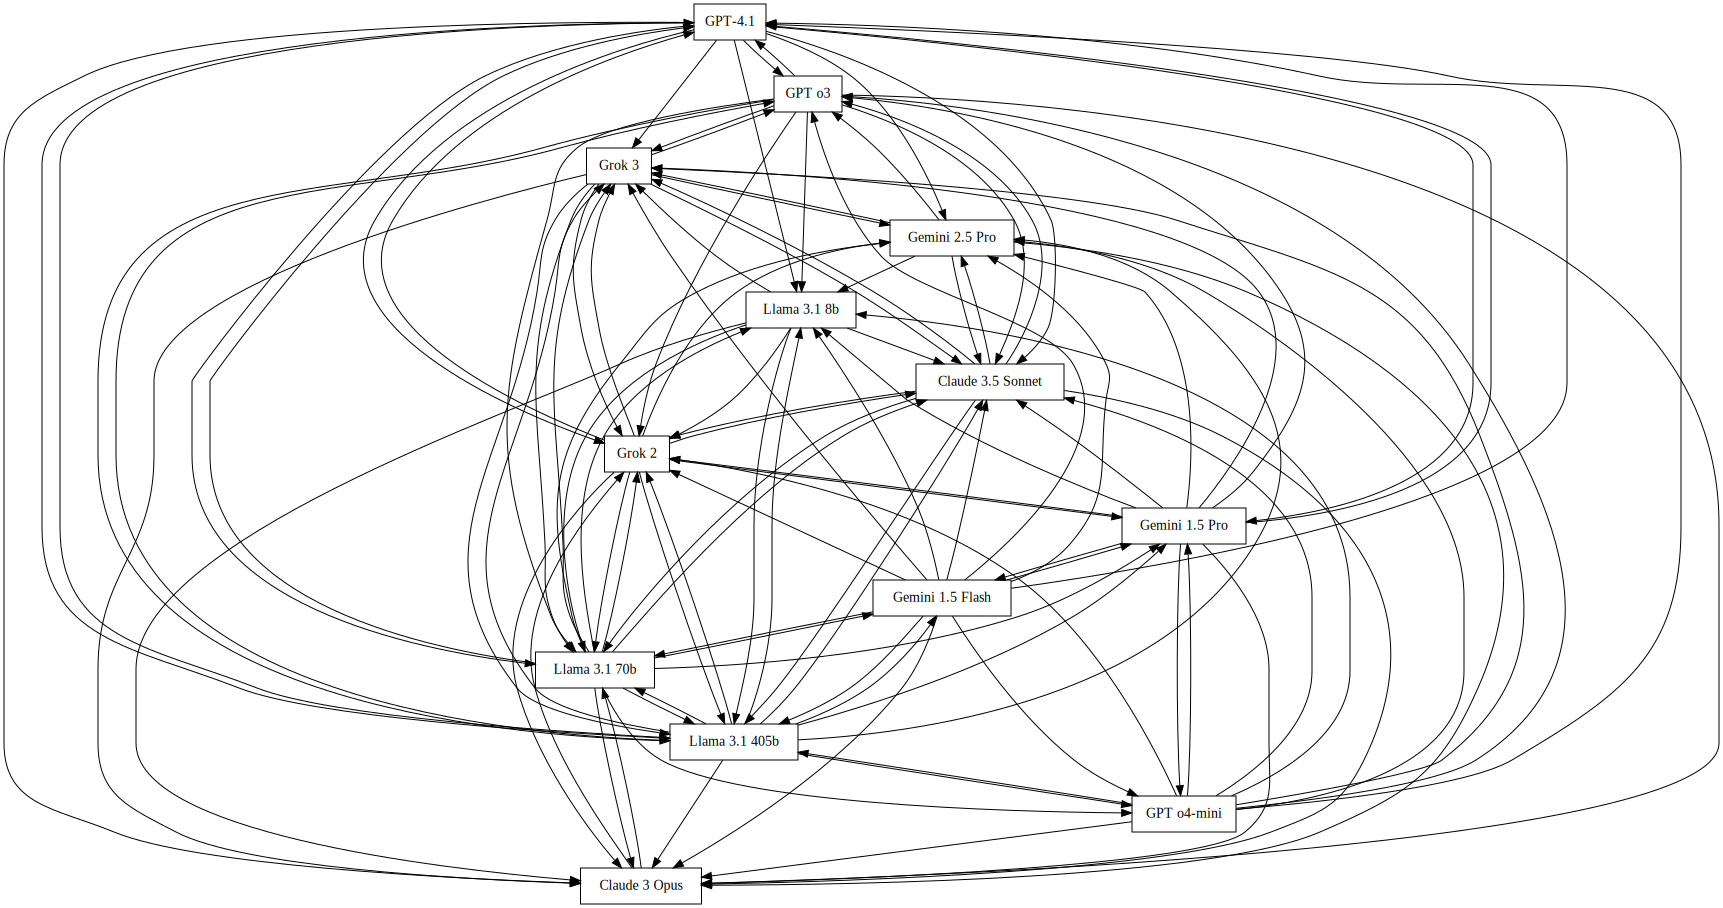

In [156]:
performance_table = PerformanceTable(
    performance_data,
    alternatives=alternatives,
    criteria=criteria,
    scales=scales
)

electre3 = Electre3(
    criteria_weights=criteria,
    preference_thresholds=p,
    indifference_thresholds=q,
    veto_thresholds=v,
    alpha=0.3,
    beta=-0.15
)

concordance = electre3.concordance(performance_table)
display(concordance)

conc_mat_cut = concordance.where(concordance >= 0.5, 0)
AdjacencyMatrix(conc_mat_cut).plot()

In [157]:
discordance = electre3.discordance(performance_table)
display(discordance)

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000 Cost 0.87...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...
GPT o4-mini,Reasoning 0.0 Cost 0.0 Co...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000 Cost 0.00...,Reasoning 0.0 Cost 0.2 Co...,Reasoning 0.00 Cost 0.00 ...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
GPT o3,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...
Claude 3.5 Sonnet,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0.0 Cost 0.5 Co...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.00 Cost 0.25 ...,Reasoning 0 Cost 1 Contex...
Claude 3 Opus,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0.0 Cost 1.0 Co...,Reasoning 0.000 Cost 1.00...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000 Cost 1.00...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0.000 Cost 1.00...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...
Llama 3.1 405b,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 70b,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 8b,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0 Cost 0.0 Co...,Reasoning 0 Cost 0 Contex...
Grok 2,Reasoning 0 Cost 0 Contex...,Reasoning 0.00 Cost 0.75 ...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...
Grok 3,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0.0 Cost 0.5 Co...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.000000,0.391667,0.950,1.000000,1.000000,0.375,0.000000,0.000000,1.000,0.959000,0.550,0.600,0.000000
GPT o4-mini,0.185714,1.000000,0.000,0.000000,0.810000,0.000,0.478333,0.750000,0.700,0.000000,0.586,0.600,0.370833
GPT o3,0.000000,0.000000,1.000,0.000000,1.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000000
Claude 3.5 Sonnet,0.000000,0.000000,0.600,1.000000,1.000000,0.000,0.000000,0.000000,0.750,0.950000,0.550,0.350,0.000000
Claude 3 Opus,0.000000,0.000000,0.000,0.000000,1.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000000
Llama 3.1 405b,0.550000,0.600000,0.600,0.963000,1.000000,1.000,0.965833,0.554167,0.997,0.925088,0.550,0.600,0.558333
Llama 3.1 70b,0.550000,0.600000,0.420,0.740000,0.963000,0.790,1.000000,0.658565,0.950,0.817282,0.550,0.600,0.600000
Llama 3.1 8b,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,1.000000,0.000,0.000000,0.300,0.250,0.339000
Grok 2,0.510000,0.134615,0.350,0.705506,1.000000,0.000,0.000000,0.000000,1.000,0.683294,0.550,0.600,0.000000
Grok 3,0.000000,0.000000,0.626,1.000000,1.000000,0.000,0.000000,0.000000,0.750,1.000000,0.564,0.350,0.000000


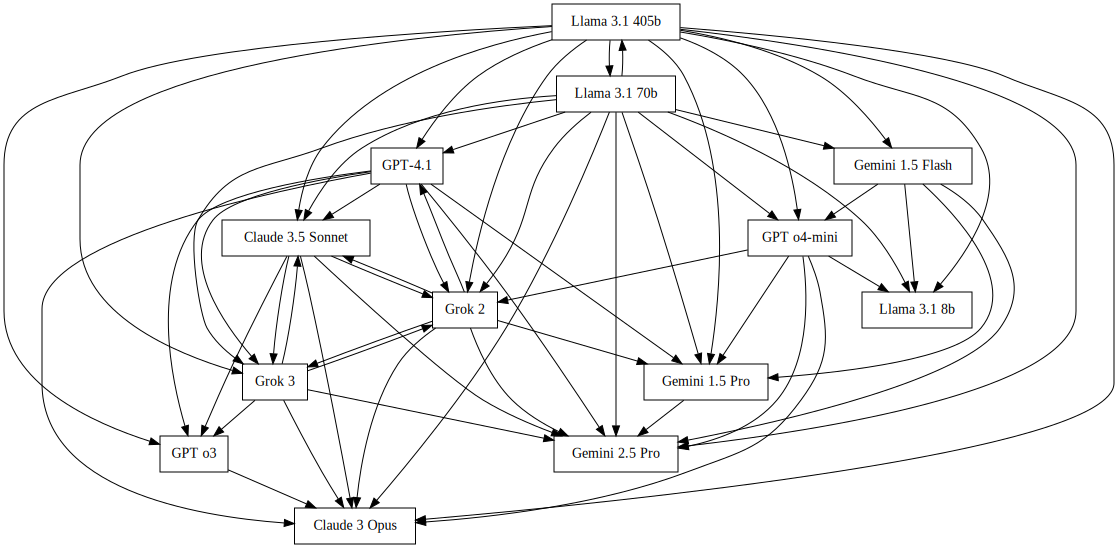

In [158]:
credibility = electre3.construct(performance_table)
display(credibility)

cred_mat_cut = credibility.where(credibility > 0.5, 0)
AdjacencyMatrix(cred_mat_cut).plot()

Ascending Distillation: [['GPT-4.1', 'GPT o4-mini', 'Llama 3.1 405b', 'Gemini 1.5 Flash'], ['GPT o3', 'Llama 3.1 70b', 'Llama 3.1 8b', 'Gemini 1.5 Pro'], ['Grok 3', 'Gemini 2.5 Pro'], ['Claude 3.5 Sonnet', 'Grok 2'], ['Claude 3 Opus']]
[['GPT-4.1', 'GPT o4-mini', 'Llama 3.1 405b', 'Gemini 1.5 Flash'], ['GPT o3', 'Llama 3.1 70b', 'Llama 3.1 8b', 'Gemini 1.5 Pro'], ['Grok 3', 'Gemini 2.5 Pro'], ['Claude 3.5 Sonnet', 'Grok 2'], ['Claude 3 Opus']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

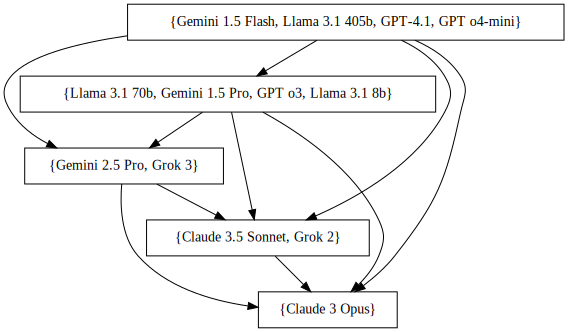

In [159]:
ascending = electre3.distillation(cred_mat_cut, ascending=True)
print("Ascending Distillation:", ascending)
OutrankingMatrix.from_ranked_categories(ascending).graph_condensation.plot()

print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

[['GPT-4.1', 'Llama 3.1 405b'], ['Gemini 1.5 Flash'], ['Llama 3.1 70b', 'Grok 3'], ['GPT o3', 'Claude 3.5 Sonnet', 'Grok 2', 'Gemini 1.5 Pro'], ['GPT o4-mini', 'Claude 3 Opus', 'Llama 3.1 8b', 'Gemini 2.5 Pro']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

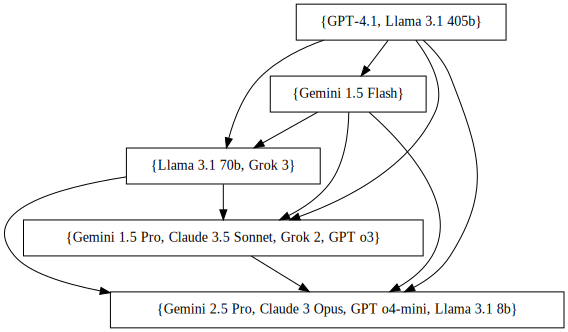

In [160]:
descending = electre3.distillation(cred_mat_cut, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

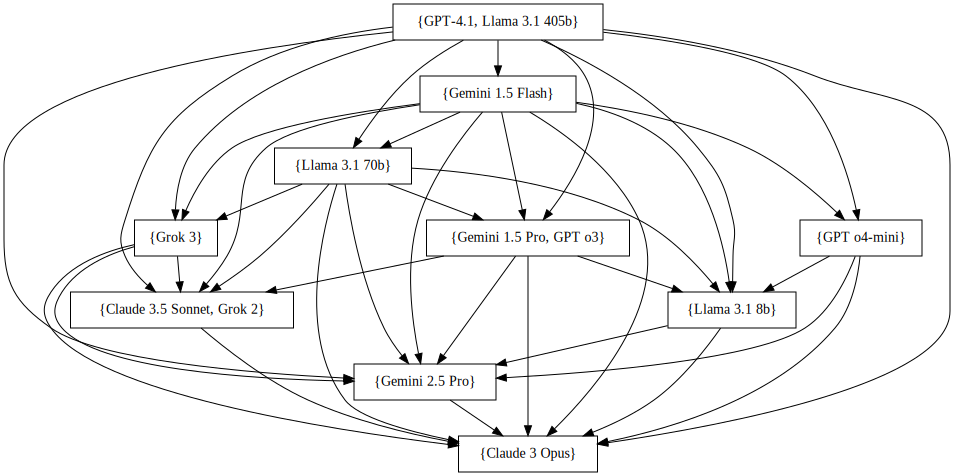

In [161]:
ranking = electre3.exploit(cred_mat_cut)
ranking.graph_condensation.plot()

In [162]:
qualification = electre3.qualification(cred_mat_cut)
print(qualification)

GPT-4.1              5
GPT o4-mini          0
GPT o3               0
Claude 3.5 Sonnet   -2
Claude 3 Opus       -7
Llama 3.1 405b       5
Llama 3.1 70b        1
Llama 3.1 8b        -1
Grok 2              -2
Grok 3               0
Gemini 2.5 Pro      -2
Gemini 1.5 Pro       0
Gemini 1.5 Flash     3
dtype: int64
